# Notebook content


This notebook is meant to provide an example on how to use multi algorithm runner with plotting capabilities.

In [1]:
import sys

sys.path.append("../")

In [2]:
from evolution_strategies.species import StrategyParams, SocioCognitiveEvolutionStrategy
from jmetal.util.termination_criterion import StoppingByEvaluations
from evolution_strategies.evolution_strategy import EvolutionStrategyWithHistory
from jmetal.operator import PolynomialMutation
from jmetal.problem.singleobjective.unconstrained import Rastrigin

In [3]:
from framework.runner.primitives import ExecutionUnit, PlotSeries, DrawingProperties
from framework.runner.multi_algorithm_runner import MultiAlgorithmRunner, save_execution_history

### Registration of execution unit

``ExecutionUnit`` is meant to hold basic information about the problem to solve. ``drawing_fun`` is a callback executed in context of algorithm instance to fetch the plotting data - among others list of xs and ys values.

In [4]:
first_execution_unit = ExecutionUnit(
    algorithm_cls=SocioCognitiveEvolutionStrategy,
    problem_name="Rastrigin",
    drawing_fun=lambda algorithm, label: PlotSeries(
        xs=list(range(len(algorithm.get_history()))),
        ys=algorithm.get_history(),
        label=label
    )
)

### Registration of algorithm evaluation runs

Runs may be used to evaluate the same algorithm w.r.t. multiple parameters. ``parameter`` should hold all class constructor arguments that should be used when initializing algorithm class.

In [5]:
elitist = True
max_evaluations = 25000

first_execution_unit = first_execution_unit.register_run(
    parameters={
        "problem": Rastrigin(number_of_variables=50),
        "strategies_params": [StrategyParams(mu=20, lambda_=140, elitist=elitist, look_at_others_probability=0.2)],
        "termination_criterion": StoppingByEvaluations(max_evaluations=max_evaluations)
    },
    drawing_label="SCES, mu=20, lambda=140",
    repetitions=3
).register_run(
    parameters={
        "problem": Rastrigin(number_of_variables=50),
        "strategies_params": [StrategyParams(mu=30, lambda_=170, elitist=elitist, look_at_others_probability=0.2)],
        "termination_criterion": StoppingByEvaluations(max_evaluations=max_evaluations)
    },
    drawing_label="SCES, mu=30, lambda=170",
    repetitions=3
)

In [6]:
second_execution_unit = ExecutionUnit(
    algorithm_cls=EvolutionStrategyWithHistory,
    problem_name="Rastrigin",
    drawing_fun=lambda algorithm, label: PlotSeries(
        xs=list(range(len(algorithm.get_history()))),
        ys=algorithm.get_history(),
        label=label
    )
).register_run(
    parameters={
        "problem": Rastrigin(number_of_variables=50),
        "mu": 20, 
        "lambda_": 140,
        "elitist": elitist,
        "mutation": PolynomialMutation(probability=1.0 / 50),
        "termination_criterion": StoppingByEvaluations(max_evaluations=max_evaluations)
    },
    drawing_label="ES, mu=30, lambda=170",
    repetitions=3
)

## Running experiments

In [7]:
runner = MultiAlgorithmRunner(
    execution_units=[
        first_execution_unit, second_execution_unit
    ],
    drawing_properties=DrawingProperties(
        title="Test experiment",
        target_location="./experiment_results_plots.png"
    )
)

100%|██████████| 2/2 [02:22<00:00, 71.46s/it] 


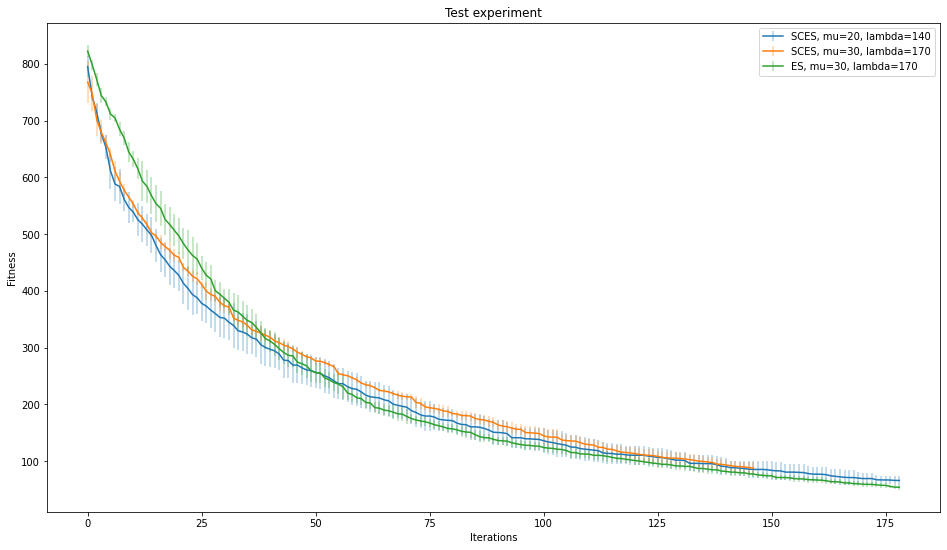

In [8]:
results = runner.run_all()